In [1]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

In [2]:
from optimization_target import target_func, FUNC_DOMAIN, FUNC_RANGE, TUNABLE_PARAM_NAME, METRIC_NAME

In [3]:
print(f"x: target_func domain = {FUNC_DOMAIN} :: {TUNABLE_PARAM_NAME}")
print(f"y: target_func range  = {FUNC_RANGE} :: {METRIC_NAME}")

x: target_func domain = (0, 1000000) :: sched_migration_cost_ns
y: target_func range  = (0.2, 1.8) :: Latency, ms


In [4]:
NUM_SAMPLES = 10

np.random.seed(42)

In [5]:
# df = pandas.DataFrame({"x": [], "y": []})
df = pandas.DataFrame({"x": np.random.uniform(0, 1000000, NUM_SAMPLES).tolist() + [480000]})
df["y"] = df.x.apply(target_func)
df

,x,y
0,374540.118847,0.680795
1,950714.306410,1.373329
2,731993.941811,0.726630
3,598658.484197,0.652248
4,156018.640442,0.645717
5,155994.520336,0.645547
6,58083.612168,0.683273
7,866176.145775,1.099371
8,601115.011743,0.644523
9,708072.577796,0.715542


In [6]:
num_prior_samples = 1
prior_x = np.linspace(-200000, 1200000, num_prior_samples).reshape(-1, 1)
prior_y = np.ones(num_prior_samples) * 2.47
prior_alpha = np.ones(num_prior_samples) * 4.0

x = np.concatenate([prior_x, df.x.to_numpy().reshape(-1, 1)])
y = np.concatenate([prior_y, df.y.to_numpy()])
alpha = np.concatenate([prior_alpha, np.zeros(len(df.y))])

# x = prior_x
# y = prior_y
# alpha = prior_alpha

kernel = RBF(length_scale=80000, length_scale_bounds="fixed")
gp = GaussianProcessRegressor(kernel=kernel, alpha=alpha, random_state=42).fit(x, y)

Check out https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_prior_posterior.html

In [7]:
colors_dark2 = [
    "#1b9e77",
    "#d95f02",
    "#7570b3",
    "#e7298a",
    "#66a61e",
    "#e6ab02",
]

num_sample_funcs = 0

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:479: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


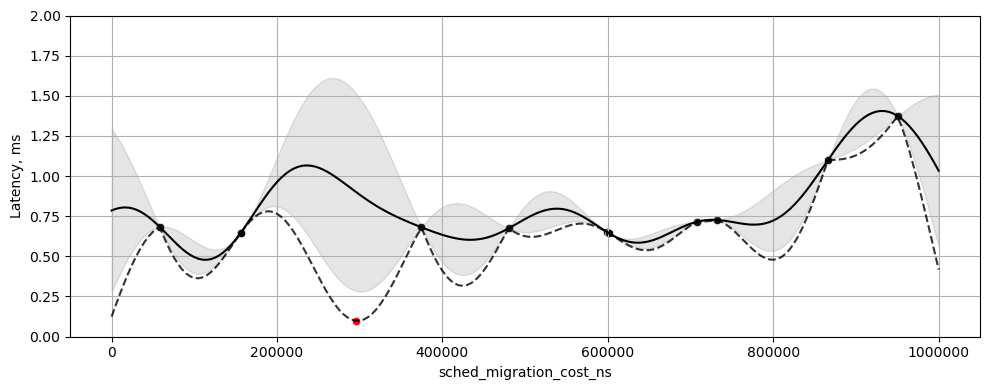

In [8]:
plt.rcParams["figure.figsize"] = (10, 4)

_fig, ax = plt.subplots()

sns.scatterplot(data=df, x="x", y="y", marker='o', color="black", alpha=0.9)
# sns.scatterplot(data=df.loc[[df.y.argmin()]], x="x", y="y", marker='o', color="red", alpha=1)

x = np.linspace(0, 1000000, 201).reshape(-1, 1)
y = gp.sample_y(x, n_samples=num_sample_funcs, random_state=41)
y_mean, y_std = gp.predict(x, return_std=True)

for i in range(num_sample_funcs):
    sns.lineplot(x=x[:,0], y=y[:,i], color=colors_dark2[i], alpha=0.6, linestyle='--')

sns.lineplot(x=x[:,0], y=y_mean, color="black")
# sns.scatterplot(x=[x[y_mean.argmin(),0]], y=[y_mean.min()], marker='o', color="red", alpha=1)

plt.fill_between(x[:,0], y_mean - y_std, y_mean + y_std, alpha=0.1, color="black")

kappa = 1.3
sns.lineplot(x=x[:,0], y=y_mean - y_std * kappa, color="black", alpha=0.8, linestyle='--')
sns.scatterplot(x=[x[(y_mean - y_std * kappa).argmin(),0]], y=[(y_mean - y_std * kappa).min()], marker='o', color="red", alpha=1)

plt.xlim(-50000, 1050000)
plt.ylim(0, 2)

plt.ticklabel_format(axis="both", style="plain")

plt.xlabel(TUNABLE_PARAM_NAME)
plt.ylabel(METRIC_NAME)

# plt.title("Optimizing Redis performance")
plt.grid()
plt.tight_layout()

# plt.savefig("img/sigmod2025_tutorial_02_bo_01_start.png", transparent=False, dpi=300)
# plt.savefig("img/sigmod2025_tutorial_02_bo_02_func.png", transparent=False, dpi=300)
# plt.savefig("img/sigmod2025_tutorial_02_bo_03_default_trial.png", transparent=False, dpi=300)
# plt.savefig("img/sigmod2025_tutorial_02_bo_04_update_trial_1.png", transparent=False, dpi=300)
# plt.savefig("img/sigmod2025_tutorial_02_bo_05_trial_1_func.png", transparent=False, dpi=300)
# plt.savefig("img/sigmod2025_tutorial_02_bo_06_trial_3.png", transparent=False, dpi=300)
# plt.savefig("img/sigmod2025_tutorial_02_bo_07_trial_3_func.png", transparent=False, dpi=300)
# plt.savefig("img/sigmod2025_tutorial_02_bo_08_trial_11.png", transparent=False, dpi=300)
# plt.savefig("img/sigmod2025_tutorial_02_bo_09_trial_11_func.png", transparent=False, dpi=300)

# plt.savefig("img/sigmod2025_tutorial_03_ucb_01_start.png", transparent=False, dpi=300)
# plt.savefig("img/sigmod2025_tutorial_03_ucb_02_exploit.png", transparent=False, dpi=300)
# plt.savefig("img/sigmod2025_tutorial_03_ucb_03_explore.png", transparent=False, dpi=300)
# plt.savefig("img/sigmod2025_tutorial_03_ucb_04_kappa1.png", transparent=False, dpi=300)
plt.savefig("img/sigmod2025_tutorial_03_ucb_05_kappa2.png", transparent=False, dpi=300)

plt.show()

# display(y_mean)